In [35]:
import pandas as pd

In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [39]:
def calculate_pNt(a =.7, b=.3, pXt = 1.3, yN = 1, yM=1, yX=1, dt=1, dt_plus_1=1, r=.04, xi_MX=.5, xi_TN=0.6):
    numerator = (yM + yX + dt_plus_1 / (1 + r) - dt)
    term1_base = 1 + (pXt**(1-xi_MX)) * ((1 - b) / b) ** xi_MX
    term2_base = pXt + (pXt**(xi_MX)) * ((1 - b) / b) ** (-xi_MX)

    term1 = (numerator / term1_base) ** (1 - 1 / xi_MX)
    term2 = (numerator / term2_base) ** (1 - 1 / xi_MX)

    pN_t = ((1 - a) / a) * (1 / (2*yN))**(1/xi_TN) * ((b * term1 + (1 - b) * term2) ** (1 / ((1 - 1 / xi_MX) * (1 / xi_TN))))
    return pN_t
calculate_pNt(a = .31)

0.6448256266435384

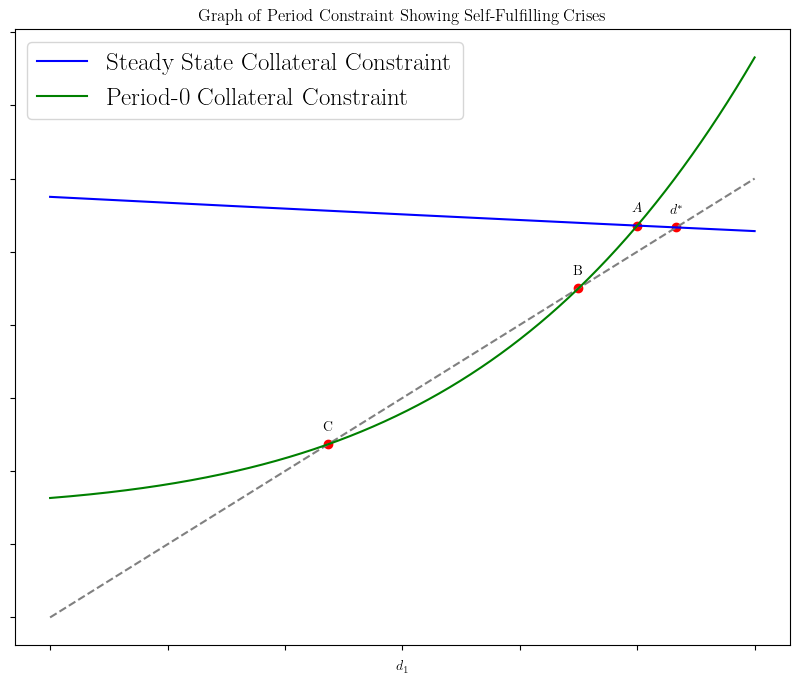

In [85]:
import numpy as np
import matplotlib.pyplot as plt



# Define the implicit function's right-hand side
def rhs_d(d, kappa, a, r, xi_TN, yM, yX):
    term1 = yM + yX
    term2 = (1 - a) / a
    term3 = (term1 - d * r / (1 + r)) / 2
    term4 = np.power(term3, 1 / xi_TN) if term3 > 0 else 0  # Ensure term3 is positive for root calculation
    return kappa * (term1 + term2 * term4)

# Parameters
kappa = 0.15
yM = 1
yX = 1
a = 0.15
r = 0.04
xi_TN = 0.2
d_t = 1

# Generate values for d
d_values = np.linspace(0, 1.2, 800)
lhs_values = d_values

# Calculate RHS values
rhs_values = [rhs_d(d, kappa, a, r, xi_TN, yM, yX) for d in d_values]

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(d_values, d_values, linestyle='--', color='gray')

index = np.argmin(np.abs(lhs_values - rhs_values))
d_star = d_values[index]

# Check if LaTeX is needed and installed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
label_rhs =  'Steady State Collateral Constraint'


plt.plot(d_values, rhs_values, label=label_rhs, color='blue')
plt.scatter([d_star], [lhs_values[index]], color='red')  # mark the intersection point
plt.annotate('$d^*$', (d_star, lhs_values[index]), textcoords="offset points", xytext=(0,10), ha='center')



def new_rhs_d(d, kappa, a, r, xi_TN, yM, yX, d_t):
    term1 = yM + yX
    term2 = (1 - a) / a
    adjusted_d = (d / (1 + r)) - d_t  # This is d_{t+1}/(1+r) - d_t
    term3 = (term1 + adjusted_d) / 2
    term4 = np.power(term3, 1 / xi_TN) if term3 > 0 else 0  # Ensure term3 is positive for root calculation
    return kappa * (term1 + term2 * term4)

new_rhs_values = [new_rhs_d(d, kappa, a, r, xi_TN, yM, yX, d_t) for d in d_values]


label_new_rhs = 'Period-0 Collateral Constraint'
plt.plot(d_values, new_rhs_values, label=label_new_rhs,  color='green')

diff = np.abs(lhs_values - new_rhs_values)
intersections = d_values[np.where(diff < 0.0003)]

for index, d_star in enumerate(intersections):
    plt.scatter([d_star], [d_star], color='red')  # mark the intersection point
    label = 'C' if index == 0 else 'B'
    plt.annotate(label, (d_star, d_star), textcoords="offset points", xytext=(0,10), ha='center')

rhs_values = np.array([rhs_d(d, kappa, a, r, xi_TN, yM, yX) for d in d_values])
new_rhs_values = np.array([new_rhs_d(d, kappa, a, r, xi_TN, yM, yX, d_t) for d in d_values])

index = np.argmin(np.abs(rhs_values - new_rhs_values))
d_star = d_values[index]
plt.scatter([d_star], [rhs_values[index]], color='red')  # mark the intersection point
plt.annotate('$A$', (d_star, rhs_values[index]), textcoords="offset points", xytext=(0,10), ha='center')





# Enhance plot
plt.title('Graph of Period Constraint Showing Self-Fulfilling Crises')
plt.xlabel(r'$d_1$')
plt.ylabel('')
plt.grid(False)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.legend()
plt.legend(loc=2, prop={'size': 10})
plt.legend(fontsize=18)
plt.savefig('graphPeriod.png')
plt.show()


In [45]:


index = np.argmin(np.abs(rhs_values - new_rhs_values))



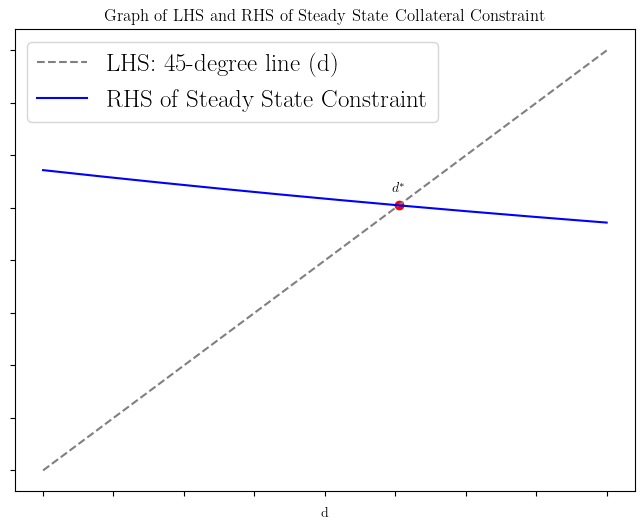

In [87]:
import numpy as np
import matplotlib.pyplot as plt



# Define the implicit function's right-hand side
def rhs_d(d, kappa, a, r, xi_TN, yM, yX):
    term1 = yM + yX
    term2 = (1 - a) / a
    term3 = (term1 - d * r / (1 + r)) / 2
    term4 = np.power(term3, 1 / xi_TN) if term3 > 0 else 0  # Ensure term3 is positive for root calculation
    return kappa * (term1 + term2 * term4)

# Parameters
kappa = 0.33
yM = 1
yX = 1
a = 0.3
r = 0.04
xi_TN = 0.1

# Generate values for d
d_values = np.linspace(0, 2, 800)
lhs_values = d_values

# Calculate RHS values
rhs_values = [rhs_d(d, kappa, a, r, xi_TN, yM, yX) for d in d_values]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(d_values, d_values, label='LHS: 45-degree line (d)', linestyle='--', color='gray')

index = np.argmin(np.abs(lhs_values - rhs_values))
d_star = d_values[index]

# Check if LaTeX is needed and installed
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
label_rhs =  'RHS of Steady State Constraint'


plt.plot(d_values, rhs_values, label=label_rhs, color='blue')
plt.scatter([d_star], [lhs_values[index]], color='red')  # mark the intersection point
plt.annotate('$d^*$', (d_star, lhs_values[index]), textcoords="offset points", xytext=(0,10), ha='center')

# Enhance plot
plt.title('Graph of LHS and RHS of Steady State Collateral Constraint')
plt.xlabel('d')
plt.ylabel('')
plt.grid(False)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.legend(loc=2, prop={'size': 13})
plt.legend(fontsize=18)
plt.savefig('graphPerio.png')

plt.show()


In [47]:
from scipy.optimize import fsolve
import numpy as np

def solve_for_d(kappa, b, yM, yX, pXt, r, xi_TN):
    def implicit_eq(d, kappa, b, yM, yX, pXt, r, xi_TN):
        part1 = yM + pXt * yX - r * d / (1 + r)
        rhs = kappa * ((b * part1**b * (1 - b) / pXt * part1**(1 - b)) ** (1 / xi_TN))
        return rhs - d

    initial_guess = 1
    d_solution, = fsolve(implicit_eq, initial_guess, args=(kappa, b, yM, yX, pXt, r, xi_TN))
    return d_solution

def calculate_expression(a, kappa, b, yM, yX, pXt, r, xi_TN):
    # First, solve for d
    d = solve_for_d(kappa, b, yM, yX, pXt, r, xi_TN)
    
    # Calculate the term inside the large parenthesis
    numerator_part = (1 - b) * b * (-r * d / (r + 1) + pXt * yX + yM) / pXt
    numerator = (1 - a) * kappa * r * (numerator_part ** (1 / xi_TN))
    
    # Calculate the denominator
    denominator_part = -r * d / (r + 1) + pXt * yX + yM
    denominator = a * (r + 1) * xi_TN * denominator_part
    
    # Calculate the final expression
    final_expression = -numerator / denominator
    return final_expression

# Example usage
a = 0.7
kappa = 1.0
b = 0.5
yM = 1.0
yX = 1.0
pXt = 1.0
r = 0.05
xi_TN = 1.0

result = calculate_expression(a, kappa, b, yM, yX, pXt, r, xi_TN)
print("Result:", result)


Result: -0.005102040816326531


In [48]:
from scipy.optimize import fsolve
import numpy as np

xi_TN = 0.5

def implicit_eq(d, kappa, a, b, yM, yX, pXt, r, xi_TN):
    # Calculate the term inside the parenthesis
    inner_part = pXt * yX + yM - r * d / (1 + r)
    term = (1 - b) * b * inner_part / pXt
    powered_term = (term ** (1 / xi_TN))
    rhs = kappa * (yM + yX + (1 - a) / a * powered_term)
    # Calculate the difference between the right-hand side and d
    return rhs - d

def solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN):
    # Initial guess for d
    initial_guess = 1
    # Solve the equation
    d_solution, = fsolve(implicit_eq, initial_guess, args=(kappa, a, b, yM, yX, pXt, r, xi_TN))
    return d_solution

# Example usage:
a = 0.31
kappa = 0.3
b = 0.3
yM = 2.0
yX = 2.0
pXt = 1.0
r = 0.05
xi_TN = 0.5

def calculate_expression(a, kappa, b, yM, yX, pXt, r, xi_TN):
    # First, solve for d
    d = solve_for_d(a, kappa, b, yM, yX, pXt, r, xi_TN)
    
    # Calculate the term inside the large parenthesis
    numerator_part = (1 - b) * b * (-r * d / (r + 1) + pXt * yX + yM) / pXt
    numerator = (1 - a) * kappa * r * (numerator_part ** (1 / xi_TN))
    
    # Calculate the denominator
    denominator_part = -r * d / (r + 1) + pXt * yX + yM
    denominator = a * (r + 1) * xi_TN * denominator_part
    
    # Calculate the final expression
    final_expression = -numerator / denominator
    return final_expression

# Example usage


result = calculate_expression(a, kappa, b, yM, yX, pXt, r, xi_TN)
print("Result:", result)

d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN)
print("Solution for d:", d)


Result: -0.010987081563508099
Solution for d: 1.652799903960335


In [49]:
def nastyfunction2(kappa=0.33, a=0.31, r=0.04, xi_TN=0.83, yM=1, yX=1):
    # Solve for d_star first
    initial_guess = 1
    d_star_solution = fsolve(implicit_d, initial_guess, args=(K, a, r, xi_TN, yM, yX))[0]
    
    #now plug
    term1 = K * (1 - a) / a
    term2 = 1 / (2 * (1 + r))
    term3 = 1 / xi_TN
    term4 = (yM + yX + (d_star_solution / (1 + r)) - d_star_solution) / 2
    exponent = (1 - xi_TN) / xi_TN
    term5 = np.power(term4, exponent)
    
    return term1 * term2 * term3 * term5

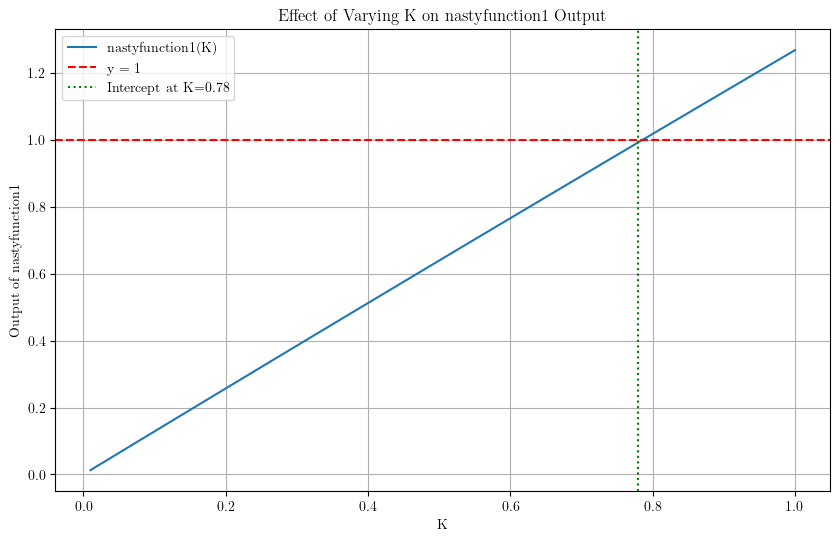

In [50]:
# Range of K values to test
K_values = np.linspace(0.01, 1.0, 100)
results = [nastyfunction1(K) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, results, label='nastyfunction1(K)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for K, result in zip(K_values, results):
    if np.isclose(result, 1, atol=0.008):  
        plt.axvline(K, color='green', linestyle=':', label=f'Intercept at K={K:.2f}')
        break  

plt.title('Effect of Varying K on nastyfunction1 Output')
plt.xlabel('K')
plt.ylabel('Output of nastyfunction1')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
def nastyfunction1(K=0.33, a=0.31, r=0.04, xi_TN=0.83, yM=1, yX=1):
    # Solve for d_star first
    initial_guess = 1
    d_star_solution = fsolve(implicit_d, initial_guess, args=(K, a, r, xi_TN, yM, yX))[0]
    
    #now plug
    term1 = K * (1 - a) / a
    term2 = 1 / (2 * (1 + r))
    term3 = 1 / xi_TN
    term4 = (yM + yX + (d_star_solution / (1 + r)) - d_star_solution) / 2
    exponent = (1 - xi_TN) / xi_TN
    term5 = np.power(term4, exponent)
    
    return term1 * term2 * term3 * term5

Result: -0.6537248144144341


In [84]:
from scipy.optimize import fsolve
import numpy as np

def implicit_eq(d, kappa, a, b, yM, yX, pXt, r, xi_TN):
    # Calculate the term inside the parenthesis
    inner_part = pXt * yX + yM - r * d / (1 + r)
    term = (1 - b) * b * inner_part / pXt
    powered_term = (term ** (1 / xi_TN))
    rhs = kappa * (yM + yX + (1 - a) / a * powered_term)
    # Calculate the difference between the right-hand side and d
    return rhs - d

def solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN):
    # Initial guess for d
    initial_guess = 1
    # Solve the equation
    d_solution, = fsolve(implicit_eq, initial_guess, args=(kappa, a, b, yM, yX, pXt, r, xi_TN))
    return d_solution

def calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, D):
    # Update the inner expression based on the new formula
    adjusted_d = d / (r + 1)
    inner_expression = adjusted_d + pXt * yX + yM - D
    term = (1 - b) * b * inner_expression / pXt
    powered_term = (term ** (1 / xi_TN))
    
    # Calculate the numerator
    numerator = (1 - a) * kappa * powered_term
    
    # Calculate the denominator
    denominator = a * (r + 1) * xi_TN * inner_expression
    
    # Compute the final expression
    final_expression = numerator / denominator
    return final_expression

# Example usage with parameters
kappa = 0.33
a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
D = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN)  # Example parameter D

# Solve for d using the updated implicit equation
d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN)

# Calculate the expression using the solved value of d
result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, D)
print("Result:", result)


Result: 0.1737217574041311


In [88]:
from scipy.optimize import fsolve
import numpy as np

def implicit_eq(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN):
    # Calculate the term inside the parenthesis
    inner_part = pXt * yX + yM - r * d / (1 + r)
    term = (1 - b) * b * inner_part / (pXt * yN)
    powered_term = (term ** (1 / xi_TN))
    rhs = kappa * (yM + yX + yN * (1 - a) / a * powered_term)
    # Calculate the difference between the right-hand side and d
    return rhs - d

def solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN):
    # Initial guess for d
    initial_guess = 1
    # Solve the equation
    d_solution, = fsolve(implicit_eq, initial_guess, args=(kappa, a, b, yM, yX, pXt, r, xi_TN, yN))
    return d_solution

def calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN):
    # Update the inner expression based on the new formula
    adjusted_d = d / (r + 1)
    inner_expression = adjusted_d + pXt * yX + yM - d
    term = (1 - b) * b * inner_expression / (pXt * yN)
    powered_term = (term ** (1 / xi_TN))
    
    # Calculate the numerator
    numerator = (1 - a) * kappa * powered_term
    
    # Calculate the denominator
    denominator = a * (r + 1) * xi_TN * inner_expression
    
    # Compute the final expression
    final_expression = numerator / denominator
    return final_expression

#parameters
kappa = 0.32 * (1+.04)
a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

# Solve for d using the updated implicit equation
d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
print("debt:", d)

# Calculate the expression using the solved value of d
result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
print("Slope:", result)


debt: 0.8448186875262851
Slope: 0.17517158861343357


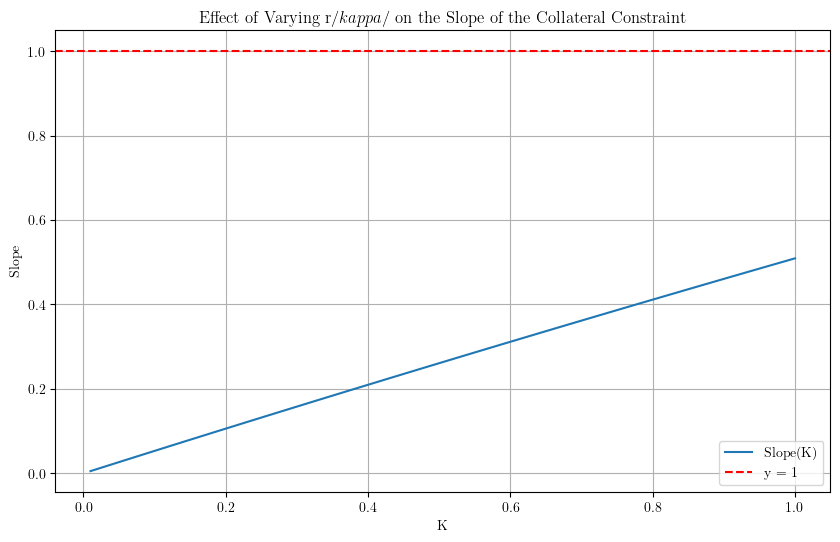

In [55]:
# Range of K values to test
def nastyfunction2(kappa, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

kappa_values = np.linspace(0.01, 1.0, 100)
results = [nastyfunction2(kappa) for kappa in kappa_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, results, label='Slope(K)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for K, result in zip(K_values, results):
    if np.isclose(result, 1, atol=0.008):  
        plt.axvline(K, color='green', linestyle=':', label=f'Intercept at K={K:.2f}')
        break  

plt.title('Effect of Varying r$/kappa/$ on the Slope of the Collateral Constraint')
plt.xlabel('K')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphK.png')
plt.show()

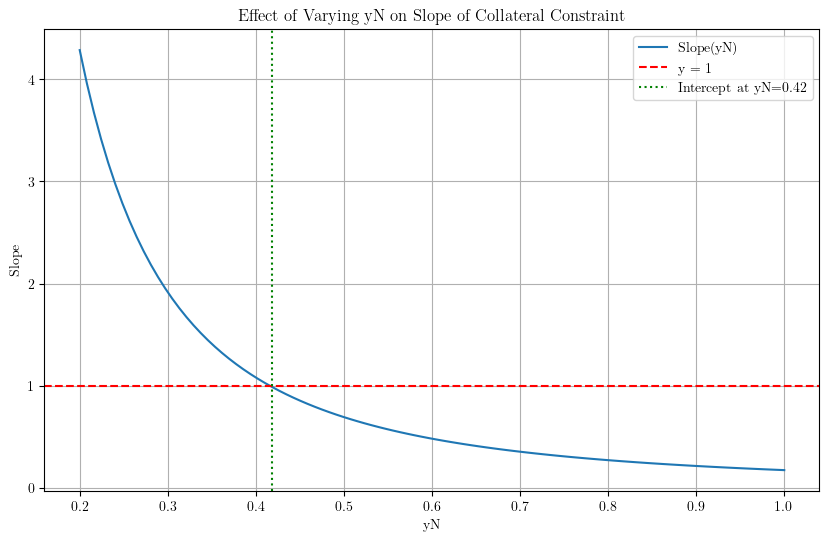

In [56]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

yN_values = np.linspace(0.2, 1.0, 100)
results = [nastyfunction2(yN = yN) for yN in yN_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yN_values, results, label='Slope(yN)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for yN, result in zip(yN_values, results):
    if np.isclose(result, 1, atol=0.02):  
        plt.axvline(yN, color='green', linestyle=':', label=f'Intercept at yN={yN:.2f}')
        break  

plt.title('Effect of Varying yN on Slope of Collateral Constraint')
plt.xlabel('yN')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphyN.png')
plt.show()


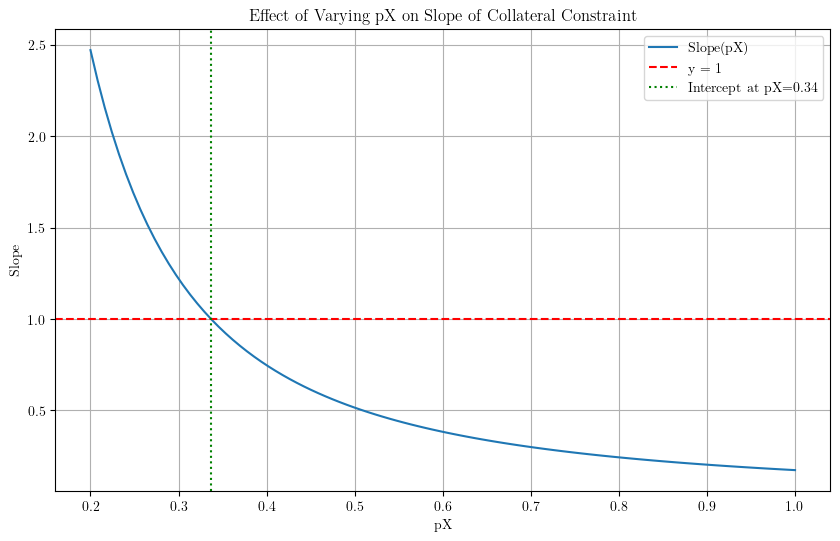

In [57]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

pXt_values = np.linspace(0.2, 1.0, 100)
results = [nastyfunction2(pXt = pXt) for pXt in pXt_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yN_values, results, label='Slope(pX)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for pXt, result in zip(pXt_values, results):
    if np.isclose(result, 1, atol=0.01):  
        plt.axvline(pXt, color='green', linestyle=':', label=f'Intercept at pX={pXt:.2f}')
        break  

plt.title('Effect of Varying pX on Slope of Collateral Constraint')
plt.xlabel('pX')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphpX.png')
plt.show()


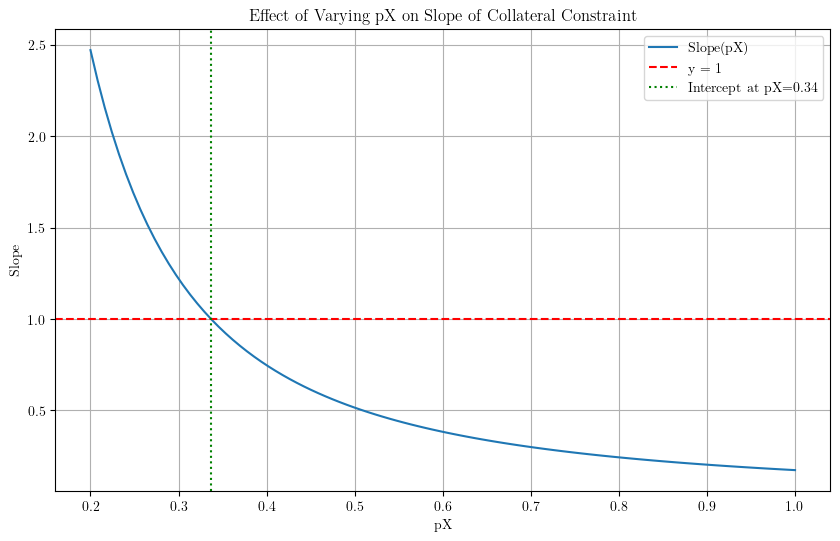

In [58]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

pXt_values = np.linspace(0.2, 1.0, 100)
results = [nastyfunction2(pXt = pXt) for pXt in pXt_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pXt_values, results, label='Slope(pX)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for pXt, result in zip(pXt_values, results):
    if np.isclose(result, 1, atol=0.01):  
        plt.axvline(pXt, color='green', linestyle=':', label=f'Intercept at pX={pXt:.2f}')
        break  

plt.title('Effect of Varying pX on Slope of Collateral Constraint')
plt.xlabel('pX')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphpX.png')
plt.show()


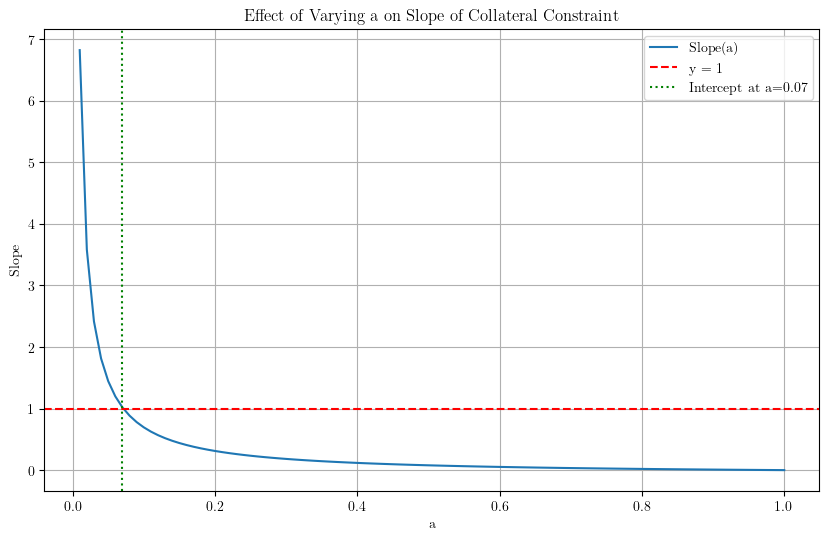

In [59]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

a_values = np.linspace(0.01, 1.0, 100)
results = [nastyfunction2(a = a) for a in a_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(a_values, results, label='Slope(a)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for a, result in zip(a_values, results):
    if np.isclose(result, 1, atol=0.04):  
        plt.axvline(a, color='green', linestyle=':', label=f'Intercept at a={a:.2f}')
        break  

plt.title('Effect of Varying a on Slope of Collateral Constraint')
plt.xlabel('a')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('grapha.png')
plt.show()


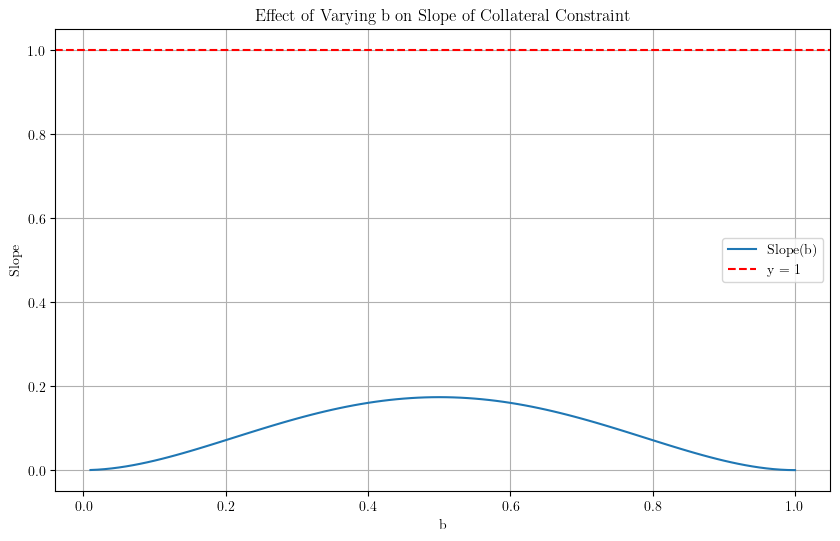

In [60]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

b_values = np.linspace(0.01, 1.0, 100)
results = [nastyfunction2(b = b) for b in b_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(b_values, results, label='Slope(b)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for b, result in zip(b_values, results):
    if np.isclose(result, 1, atol=0.04):  
        plt.axvline(a, color='green', linestyle=':', label=f'Intercept at a={a:.2f}')
        break  

plt.title('Effect of Varying b on Slope of Collateral Constraint')
plt.xlabel('b')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphb.png')
plt.show()


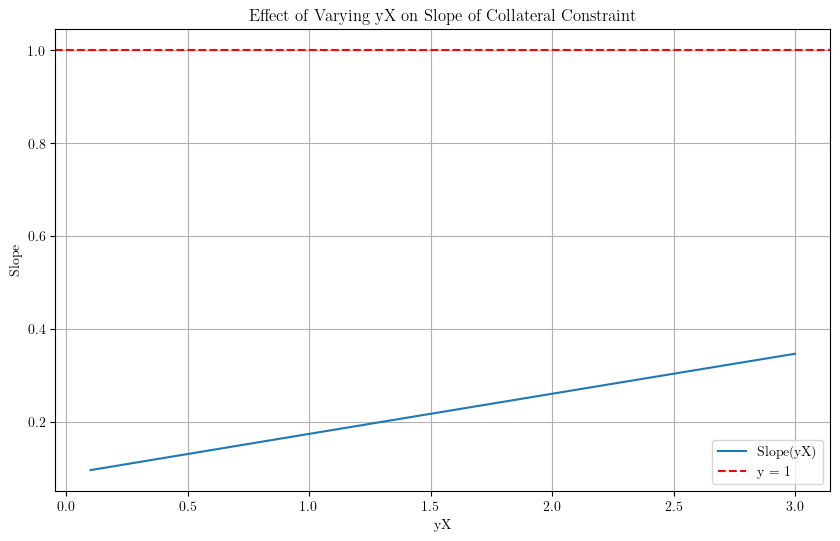

In [61]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

yX_values = np.linspace(0.1, 3.0, 100)
results = [nastyfunction2(yX = yX) for yX in yX_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yX_values, results, label='Slope(yX)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for yX, result in zip(yX_values, results):
    if np.isclose(result, 1, atol=0.04):  
        plt.axvline(a, color='green', linestyle=':', label=f'Intercept at a={a:.2f}')
        break  

plt.title('Effect of Varying yX on Slope of Collateral Constraint')
plt.xlabel('yX')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphyX.png')
plt.show()


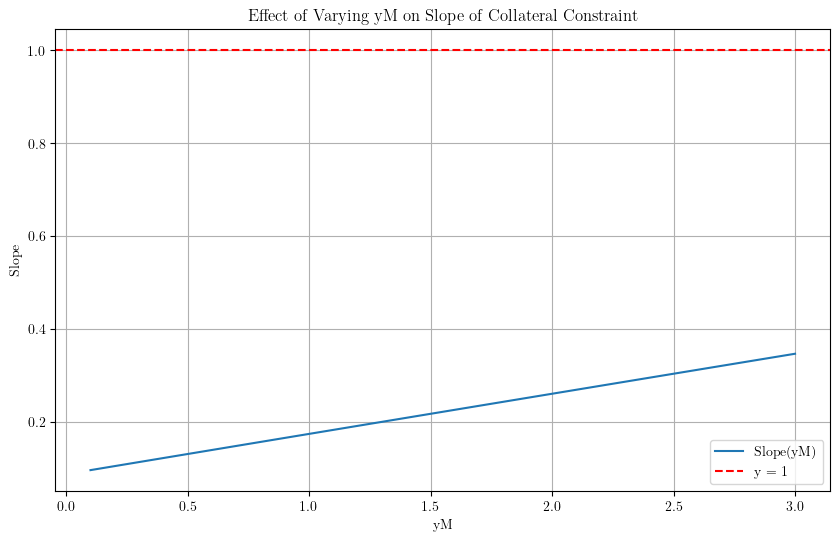

In [62]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

yM_values = np.linspace(0.1, 3.0, 100)
results = [nastyfunction2(yM = yM) for yM in yX_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yX_values, results, label='Slope(yM)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for yX, result in zip(yX_values, results):
    if np.isclose(result, 1, atol=0.04):  
        plt.axvline(a, color='green', linestyle=':', label=f'Intercept at a={a:.2f}')
        break  

plt.title('Effect of Varying yM on Slope of Collateral Constraint')
plt.xlabel('yM')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphyM.png')
plt.show()


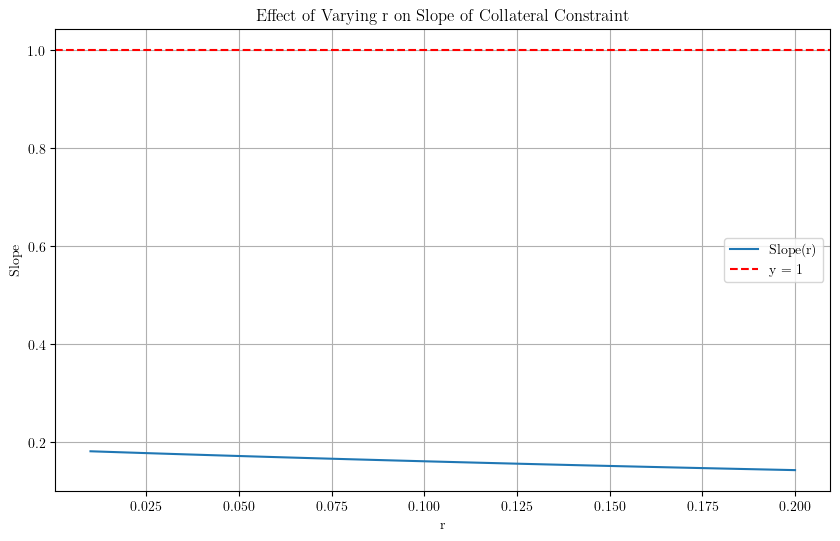

In [63]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

r_values = np.linspace(0.01, 0.2, 100)
results = [nastyfunction2(r = r) for r in r_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_values, results, label='Slope(r)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for r, result in zip(r_values, results):
    if np.isclose(result, 1, atol=0.04):  
        plt.axvline(a, color='green', linestyle=':', label=f'Intercept at a={a:.2f}')
        break  

plt.title('Effect of Varying r on Slope of Collateral Constraint')
plt.xlabel('r')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphr.png')
plt.show()


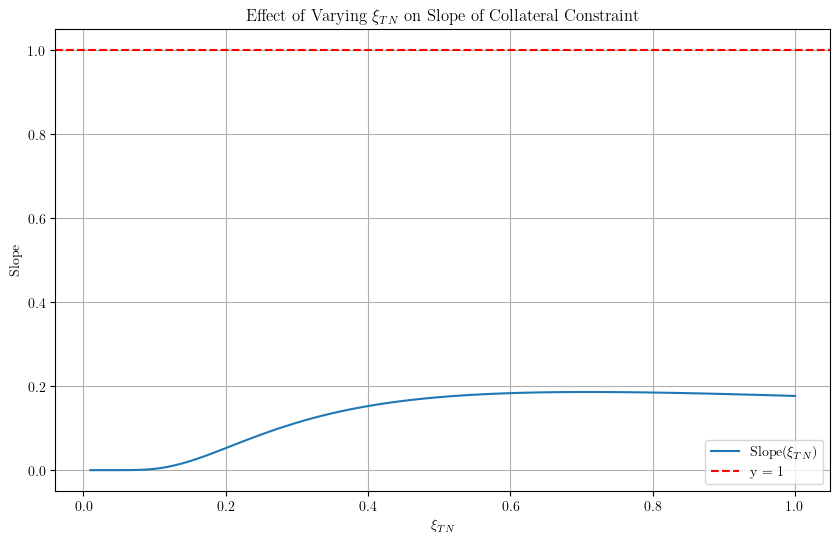

In [64]:
def nastyfunction2(kappa = 0.33, a=0.31, b =0.5, yM = 1, yX =1, pXt =1 , r = .04, xi_TN =0.5, yN=1):
    d = solve_for_d(kappa, a, b, yM, yX, pXt, r, xi_TN, yN)

    
    result = calculate_expression(d, kappa, a, b, yM, yX, pXt, r, xi_TN, yN)
    return result


a = 0.31
b = 0.5
yM = 1
yX = 1
pXt = 1
r = 0.04
xi_TN = 0.5
yN = 1

xi_TN_values = np.linspace(0.01, 1.0, 100)
results = [nastyfunction2(xi_TN = xi_TN) for xi_TN in xi_TN_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True
plt.plot(xi_TN_values, results, label=r'Slope($\xi_{TN}$)')
plt.axhline(1, color='red', linestyle='--', label='y = 1')

# Annotate intercepts
for xi_TN, result in zip(xi_TN_values, results):
    if np.isclose(result, 1, atol=0.04):  
        plt.axvline(a, color='green', linestyle=':', label=f'Intercept at a={a:.2f}')
        break  

plt.title(r'Effect of Varying $\xi_{TN}$ on Slope of Collateral Constraint')
plt.xlabel(r'$\xi_{TN}$')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.savefig('graphxi_TN.png')
plt.show()
